# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

response = requests.get(query_url + city).json()
response

{'coord': {'lon': -70.9167, 'lat': -53.15},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 55.2,
  'feels_like': 48.09,
  'temp_min': 55,
  'temp_max': 55.4,
  'pressure': 1012,
  'humidity': 82},
 'visibility': 10000,
 'wind': {'speed': 12.66, 'deg': 310},
 'clouds': {'all': 0},
 'dt': 1612409526,
 'sys': {'type': 1,
  'id': 8487,
  'country': 'CL',
  'sunrise': 1612430443,
  'sunset': 1612485270},
 'timezone': -10800,
 'id': 3874787,
 'name': 'Punta Arenas',
 'cod': 200}

In [4]:
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
name=[]
country=[]
humidity=[]
temp=[]
cloudy=[]
wind=[]
city_num=[]
lon=[]
lat=[]
date=[]

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        name.append(response['name'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp'])
        cloudy.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city_num.append(response['id'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        date.append(response['dt'])
        print(f"Processing Record | {city}")
        
    except KeyError:
        print("City not found.")
        

Beginning Data Retrieval
-----------------------------
Processing Record | vaini
City not found.
Processing Record | novocheremshansk
Processing Record | college
Processing Record | port alfred
Processing Record | busselton
Processing Record | komsomolskiy
Processing Record | saquena
Processing Record | sioux lookout
Processing Record | ushuaia
Processing Record | salalah
Processing Record | ust-omchug
Processing Record | hobart
Processing Record | santa maria
City not found.
Processing Record | inhambane
Processing Record | chumikan
Processing Record | marsa matruh
Processing Record | jamestown
Processing Record | raudeberg
Processing Record | dikson
Processing Record | cape town
Processing Record | angoche
Processing Record | chernyy yar
Processing Record | albany
Processing Record | arraial do cabo
Processing Record | conde
Processing Record | pisco
Processing Record | thompson
Processing Record | tasiilaq
Processing Record | bengkulu
Processing Record | saint-philippe
Processing Re

Processing Record | mathathane
Processing Record | saint-augustin
City not found.
City not found.
Processing Record | hajnowka
Processing Record | ponta do sol
Processing Record | dorado
Processing Record | kundiawa
Processing Record | ayagoz
Processing Record | piacabucu
Processing Record | ancud
Processing Record | kirakira
Processing Record | norden
Processing Record | neyshabur
Processing Record | sola
Processing Record | rettikhovka
Processing Record | mae sai
Processing Record | ayorou
Processing Record | sandnessjoen
Processing Record | tuatapere
Processing Record | kommunisticheskiy
Processing Record | anadyr
Processing Record | ixtapa
Processing Record | ewo
Processing Record | cherskiy
Processing Record | ruidoso
Processing Record | boa vista
Processing Record | mujiayingzi
Processing Record | carauari
Processing Record | sao joao da barra
Processing Record | bridlington
Processing Record | strezhevoy
Processing Record | manuk mangkaw
Processing Record | hithadhoo
City not fo

Processing Record | filadelfia
Processing Record | kohlu
Processing Record | nuevo progreso
Processing Record | canutama
Processing Record | wadi maliz
Processing Record | cap malheureux
Processing Record | kiruna


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
pwd

'C:\\Users\\ethom\\Desktop\\Python_APIs_Challenge\\starter_code\\Weather'

In [10]:
data = {'City': name,
         'Country': country, 
         'Humidity': humidity,
        'Lat': lat,
        'Lng': lon,
         'Temperature': temp, 
         'Cloud Cover': cloudy,
           'Winds': wind,
           'Date': date}
city_weather = pd.DataFrame(data)
city_weather

,City,Country,Humidity,Lat,Lng,Temperature,Cloud Cover,Winds,Date
0,Vaini,TO,79,-21.2000,-175.2000,84.20,75,6.91,1612409526
1,Novocheremshansk,RU,98,54.3571,50.1666,27.12,98,6.40,1612409526
2,College,US,71,64.8569,-147.8028,-6.43,90,3.44,1612409527
3,Port Alfred,ZA,91,-33.5906,26.8910,69.01,46,1.99,1612409527
4,Busselton,AU,42,-33.6500,115.3333,70.81,0,1.99,1612409527
...,...,...,...,...,...,...,...,...,...
534,Nuevo Progreso,MX,66,23.1667,-97.9500,63.88,15,7.38,1612409653
535,Canutama,BR,96,-6.5339,-64.3831,74.71,100,1.70,1612409653
536,Wadi Maliz,TN,93,36.4681,8.5495,44.60,20,2.30,1612409654
537,Cap Malheureux,MU,78,-19.9842,57.6142,82.00,0,3.00,1612409654


In [11]:
city_weather.to_csv(output_data_file, index=False)

PermissionError: [Errno 13] Permission denied: '../../output_data/cities.csv'

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
city_weather.loc[city_weather['Humidity']>100]


,City,Country,Humidity,Lat,Lng,Temperature,Cloud Cover,Winds,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

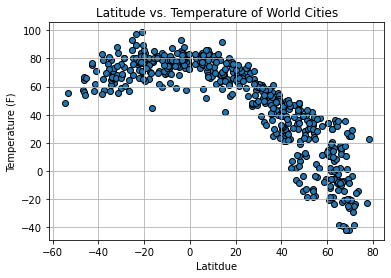

In [13]:
plt.scatter(city_weather['Lat'], city_weather['Temperature'], edgecolor='black')
plt.title('Latitude vs. Temperature of World Cities')
plt.xlabel('Latitdue')
plt.ylabel('Temperature (F)')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

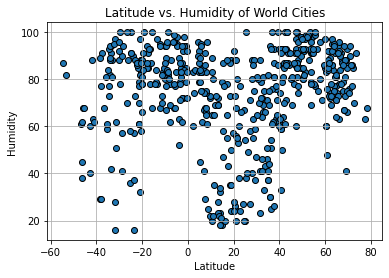

In [14]:
plt.scatter(city_weather['Lat'], city_weather['Humidity'], edgecolor='black')
plt.title('Latitude vs. Humidity of World Cities')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

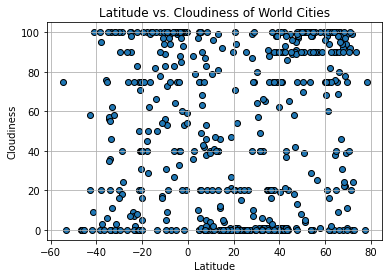

In [15]:
plt.scatter(city_weather['Lat'], city_weather['Cloud Cover'], edgecolor='black')
plt.title('Latitude vs. Cloudiness of World Cities')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

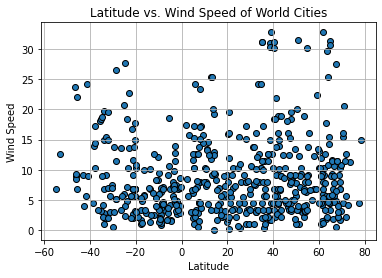

In [16]:
plt.scatter(city_weather['Lat'], city_weather['Winds'], edgecolor='black')
plt.title('Latitude vs. Wind Speed of World Cities')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

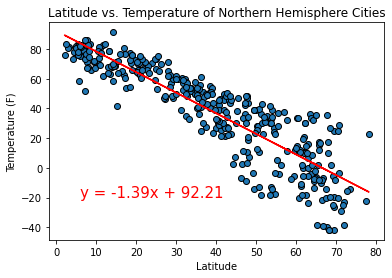

In [26]:
north_cities = city_weather.loc[city_weather['Lat']>=0]
x = north_cities['Lat']
y = north_cities['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, edgecolor='black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,-20),fontsize=15,color="red")
plt.title('Latitude vs. Temperature of Northern Hemisphere Cities')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

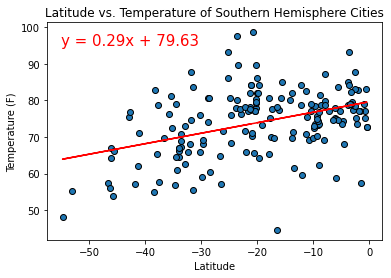

In [27]:
south_cities = city_weather.loc[city_weather['Lat']<0]
x = south_cities['Lat']
y = south_cities['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, edgecolor='black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")
plt.title('Latitude vs. Temperature of Southern Hemisphere Cities')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

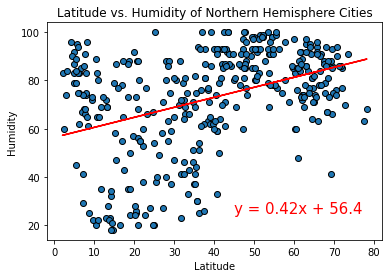

In [31]:
north_cities = city_weather.loc[city_weather['Lat']>=0]
x = north_cities['Lat']
y = north_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, edgecolor='black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(45,25),fontsize=15,color="red")
plt.title('Latitude vs. Humidity of Northern Hemisphere Cities')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

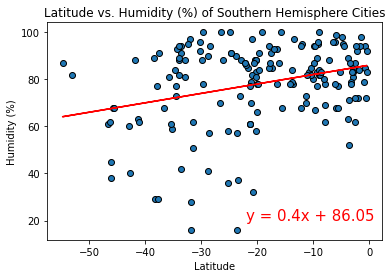

In [38]:
south_cities = city_weather.loc[city_weather['Lat']<0]
x = south_cities['Lat']
y = south_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, edgecolor='black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-22,20),fontsize=15,color="red")
plt.title('Latitude vs. Humidity (%) of Southern Hemisphere Cities')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

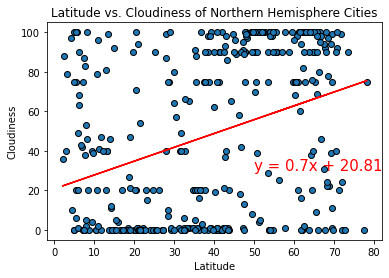

In [32]:
north_cities = city_weather.loc[city_weather['Lat']>=0]
x = north_cities['Lat']
y = north_cities['Cloud Cover']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, edgecolor='black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")
plt.title('Latitude vs. Cloudiness of Northern Hemisphere Cities')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

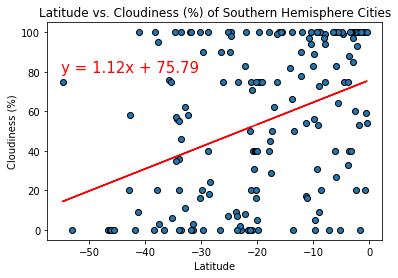

In [40]:
south_cities = city_weather.loc[city_weather['Lat']<0]
x = south_cities['Lat']
y = south_cities['Cloud Cover']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, edgecolor='black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.title('Latitude vs. Cloudiness (%) of Southern Hemisphere Cities')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

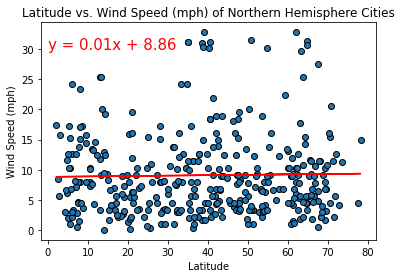

In [34]:
north_cities = city_weather.loc[city_weather['Lat']>=0]
x = north_cities['Lat']
y = north_cities['Winds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, edgecolor='black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.title('Latitude vs. Wind Speed (mph) of Northern Hemisphere Cities')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

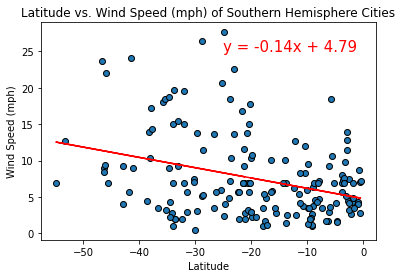

In [44]:
south_cities = city_weather.loc[city_weather['Lat']<0]
x = south_cities['Lat']
y = south_cities['Winds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, edgecolor='black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.title('Latitude vs. Wind Speed (mph) of Southern Hemisphere Cities')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()